In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_1_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase1harmonics = pd.DataFrame(dset['harmonics_i'])
phase1_2kHz = phase1harmonics.iloc[:,0:40]

In [4]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_2_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase2harmonics = pd.DataFrame(dset['harmonics_i'])
phase2_2kHz = phase2harmonics.iloc[:,0:40]

In [5]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_3_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase3harmonics = pd.DataFrame(dset['harmonics_i'])
phase3_2kHz = phase3harmonics.iloc[:,0:40]

In [6]:
allPhases = pd.concat([phase1_2kHz, phase2_2kHz, phase3_2kHz])

In [7]:
allPhases

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.036987,0.759766,0.040009,0.721191,0.024002,0.085022,0.012001,0.259033,0.016006,0.391113,...,0.013000,0.054993,0.014000,0.135010,0.016998,0.048004,0.010002,0.016998,0.009003,0.104980
1,0.024994,0.766113,0.020004,0.711914,0.020996,0.096985,0.028000,0.256104,0.022995,0.397949,...,0.010002,0.054993,0.014000,0.150024,0.013000,0.044006,0.011002,0.018005,0.011002,0.104980
2,0.020004,0.764160,0.037994,0.712891,0.032990,0.091980,0.031006,0.261963,0.029999,0.399902,...,0.010002,0.065979,0.016998,0.159058,0.020996,0.035004,0.016998,0.016006,0.016998,0.101990
3,0.040009,0.757812,0.014999,0.711914,0.024994,0.088989,0.020004,0.244019,0.020004,0.392090,...,0.014999,0.068970,0.011002,0.150024,0.016006,0.036987,0.009003,0.029999,0.013000,0.106018
4,0.028000,0.765137,0.041992,0.717773,0.032013,0.078979,0.020996,0.240967,0.018005,0.383057,...,0.018005,0.058014,0.011002,0.157959,0.016006,0.039001,0.018005,0.018997,0.012001,0.101013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168057,0.008003,0.566895,0.007000,0.440918,0.006001,0.260986,0.004002,0.219971,0.006001,0.144043,...,0.001000,0.081970,0.002001,0.058990,0.005001,0.029007,0.002001,0.026993,0.002001,0.040985
168058,0.007000,0.570801,0.005001,0.448975,0.011002,0.269043,0.006001,0.225952,0.009003,0.147949,...,0.002001,0.080017,0.002001,0.058990,0.005001,0.029007,0.002001,0.026993,0.003000,0.040009
168059,0.005001,0.571777,0.005001,0.446045,0.008003,0.266113,0.005001,0.225952,0.008003,0.149048,...,0.002001,0.077026,0.001000,0.056000,0.006001,0.029007,0.002001,0.029007,0.004002,0.040009
168060,0.004002,0.570801,0.007000,0.446045,0.006001,0.264893,0.005001,0.229004,0.004002,0.151001,...,0.002001,0.080994,0.003000,0.061005,0.006001,0.036011,0.002001,0.028000,0.003000,0.037994


In [9]:
from sklearn.decomposition import PCA

In [10]:
model = PCA(2)

In [11]:
model.fit(allPhases)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
phase1_trans = model.transform(phase1_2kHz)

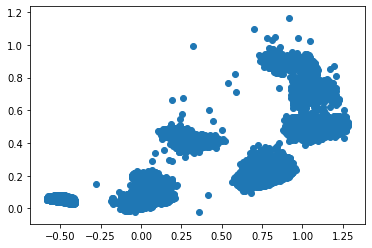

In [13]:
plt.scatter(phase1_trans[:,0], phase1_trans[:,1])
plt.show()

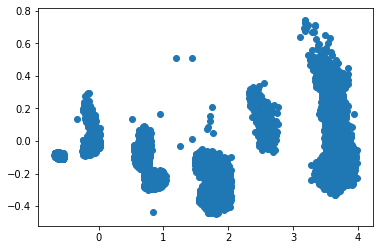

In [14]:
phase2_trans = model.transform(phase2_2kHz)
plt.scatter(phase2_trans[:,0], phase2_trans[:,1])
plt.show()

In [15]:
with h5py.File("C:\MessdatenStoeckach\\2017-03-02\harmonics_phase_0_2017-03-02.h5", "r") as f:
    dset = np.array(f["tenperiodtable"])
    phase0harmonics = pd.DataFrame(dset['harmonics_i'])
phase0_2kHz = phase0harmonics.iloc[:,0:40]

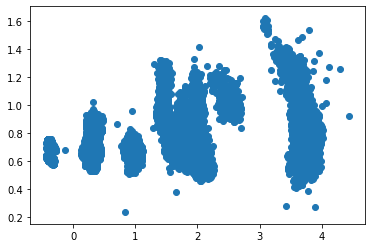

In [17]:
phase0_trans = model.transform(phase0_2kHz)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1])
plt.show()

In [20]:
allPhases.append([phase0_2kHz])

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.036987,0.759766,0.040009,0.721191,0.024002,0.085022,0.012001,0.259033,0.016006,0.391113,...,0.013000,0.054993,0.014000,0.135010,0.016998,0.048004,0.010002,0.016998,0.009003,0.104980
1,0.024994,0.766113,0.020004,0.711914,0.020996,0.096985,0.028000,0.256104,0.022995,0.397949,...,0.010002,0.054993,0.014000,0.150024,0.013000,0.044006,0.011002,0.018005,0.011002,0.104980
2,0.020004,0.764160,0.037994,0.712891,0.032990,0.091980,0.031006,0.261963,0.029999,0.399902,...,0.010002,0.065979,0.016998,0.159058,0.020996,0.035004,0.016998,0.016006,0.016998,0.101990
3,0.040009,0.757812,0.014999,0.711914,0.024994,0.088989,0.020004,0.244019,0.020004,0.392090,...,0.014999,0.068970,0.011002,0.150024,0.016006,0.036987,0.009003,0.029999,0.013000,0.106018
4,0.028000,0.765137,0.041992,0.717773,0.032013,0.078979,0.020996,0.240967,0.018005,0.383057,...,0.018005,0.058014,0.011002,0.157959,0.016006,0.039001,0.018005,0.018997,0.012001,0.101013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168057,0.016998,1.684570,0.018005,0.171997,0.020004,0.070007,0.009003,0.638184,0.014000,0.068970,...,0.003000,0.244019,0.004002,0.020004,0.018005,0.032990,0.004002,0.086975,0.004002,0.016998
168058,0.013000,1.694336,0.016998,0.175049,0.022995,0.072998,0.008003,0.646973,0.014000,0.065979,...,0.003000,0.237061,0.004002,0.022003,0.016998,0.037994,0.003000,0.091003,0.003000,0.014000
168059,0.018997,1.698242,0.020996,0.171021,0.022003,0.070984,0.011002,0.657227,0.016998,0.067993,...,0.005001,0.229980,0.005001,0.022995,0.016998,0.037994,0.002001,0.093994,0.006001,0.012001
168060,0.014000,1.699219,0.016006,0.172974,0.020004,0.070007,0.012001,0.664062,0.014000,0.068970,...,0.002001,0.241943,0.003000,0.024002,0.018005,0.037994,0.003000,0.088013,0.004002,0.013000


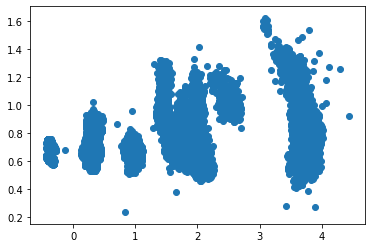

In [21]:
model.fit(allPhases)
phase0_trans = model.transform(phase0_2kHz)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1])
plt.show()

In [22]:
allPhases_trans = model.transform(allPhases)

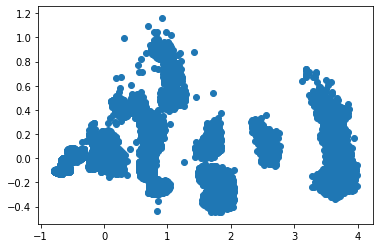

In [23]:
plt.scatter(allPhases_trans[:,0], allPhases_trans[:,1])
plt.show()

In [29]:
allPhases.shape

(504186, 40)

In [31]:
phase0_2kHz.shape

(168062, 40)

In [32]:
phase1_2kHz.shape

(168062, 40)

In [33]:
phase2_2kHz.shape

(168062, 40)

In [34]:
phase3_2kHz.shape

(168062, 40)

In [35]:
168062 * 4

672248

In [36]:
allPhases = pd.concat([phase1_2kHz, phase2_2kHz, phase3_2kHz, phase0_2kHz])

In [37]:
allPhases.shape

(672248, 40)

In [38]:
allPhases_trans = model.transform(allPhases)

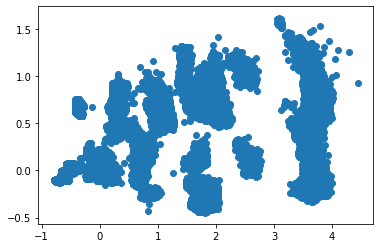

In [39]:
plt.scatter(allPhases_trans[:,0], allPhases_trans[:,1])
plt.show()

In [40]:
allPhases_trans = model.fit_transform(allPhases)

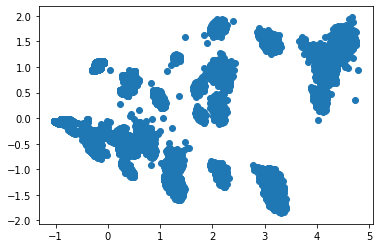

In [41]:
plt.scatter(allPhases_trans[:,0], allPhases_trans[:,1])
plt.show()

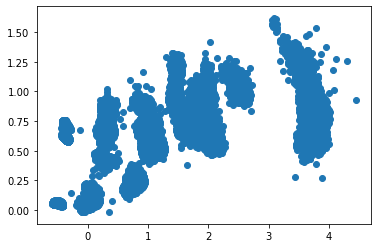

In [43]:
plt.scatter([phase0_trans[:,0], phase1_trans[:,0]], [phase0_trans[:,1], phase1_trans[:,1]])

In [44]:
model.fit(allPhases)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
phase0_trans = model.transform(phase0_2kHz)
phase1_trans = model.transform(phase1_2kHz)
phase2_trans = model.transform(phase2_2kHz)
phase3_trans = model.transform(phase3_2kHz)

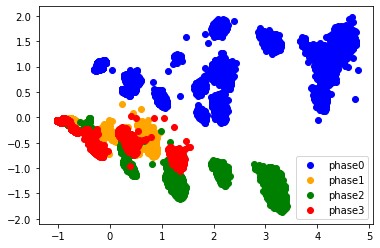

In [50]:
plt.scatter(phase0_trans[:,0], phase0_trans[:,1], color='blue', label='phase0')
plt.scatter(phase1_trans[:,0], phase1_trans[:,1], color='orange', label='phase1')
plt.scatter(phase2_trans[:,0], phase2_trans[:,1], color='green', label='phase2')
plt.scatter(phase3_trans[:,0], phase3_trans[:,1], color='red', label='phase3')
plt.legend()
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

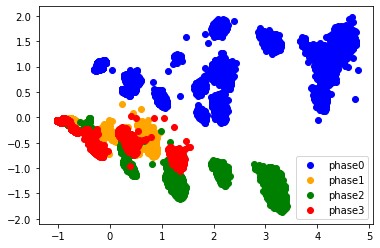

In [52]:
scaler = StandardScaler()
scaler.fit(allPhases)
scaler.transform(allPhases)
model.fit(allPhases)
phase0_trans = model.transform(phase0_2kHz)
phase1_trans = model.transform(phase1_2kHz)
phase2_trans = model.transform(phase2_2kHz)
phase3_trans = model.transform(phase3_2kHz)
plt.scatter(phase0_trans[:,0], phase0_trans[:,1], color='blue', label='phase0')
plt.scatter(phase1_trans[:,0], phase1_trans[:,1], color='orange', label='phase1')
plt.scatter(phase2_trans[:,0], phase2_trans[:,1], color='green', label='phase2')
plt.scatter(phase3_trans[:,0], phase3_trans[:,1], color='red', label='phase3')
plt.legend()
plt.show()

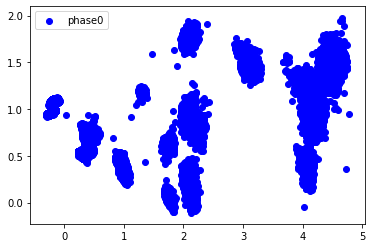

In [53]:
plt.scatter(phase0_trans[:,0], phase0_trans[:,1], color='blue', label='phase0')
plt.legend()
plt.show()